In [115]:
import pandas as pd
from pandas import date_range
from logging import Logger
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [116]:
df = pd.read_csv("./data/SN_m_tot_V2.0.csv", delimiter=";", header=None,
                 names= ['year', 'month', 'decimal year', 'SNvalue' , 'SNerror', 'Nb observations', "x"],
                 parse_dates=True)
df

,year,month,decimal year,SNvalue,SNerror,Nb observations,x
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1
...,...,...,...,...,...,...,...
3265,2021,2,2021.122,8.2,4.3,1122,1
3266,2021,3,2021.204,17.2,6.2,1322,1
3267,2021,4,2021.286,24.5,6.8,1277,0
3268,2021,5,2021.371,21.2,5.4,1237,0


In [117]:
date_index = date_range("1749-01", "2021-07", freq='M')
df.index = date_index
df

,year,month,decimal year,SNvalue,SNerror,Nb observations,x
1749-01-31,1749,1,1749.042,96.7,-1.0,-1,1
1749-02-28,1749,2,1749.123,104.3,-1.0,-1,1
1749-03-31,1749,3,1749.204,116.7,-1.0,-1,1
1749-04-30,1749,4,1749.288,92.8,-1.0,-1,1
1749-05-31,1749,5,1749.371,141.7,-1.0,-1,1
...,...,...,...,...,...,...,...
2021-02-28,2021,2,2021.122,8.2,4.3,1122,1
2021-03-31,2021,3,2021.204,17.2,6.2,1322,1
2021-04-30,2021,4,2021.286,24.5,6.8,1277,0
2021-05-31,2021,5,2021.371,21.2,5.4,1237,0


In [118]:
df.drop(["year", "month", "decimal year", "x", "Nb observations", "SNerror"], axis=1, inplace=True)
df = df.resample('M').sum()

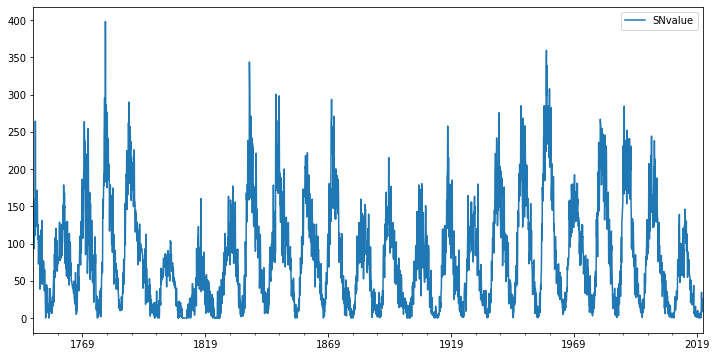

In [119]:
_ = df.plot(kind='line', figsize=(12,6))

In [120]:
def split_train_test(df, split_ratio=0.7):
    total_size = df.size
    train_size = int(split_ratio*total_size)
    df_train = df.iloc[:train_size, :]
    df_test = df.iloc[train_size:,:]
    print(f"df_train.size = {df_train.size}")
    print(f"df_test.size = {df_test.size}")
    return df_train, df_test

def plot_train_test(df_train, df_test, title=""):
    fig = plt.figure(figsize=(12,6))
    _ = plt.title(label=title)
    _ = plt.plot(df_train, label="train set")
    _ = plt.plot(df_test, label="test set")
    _ = plt.legend()
    _ = plt.tight_layout()
    _ = plt.show()
    return fig

df_train.size = 2289
df_test.size = 981


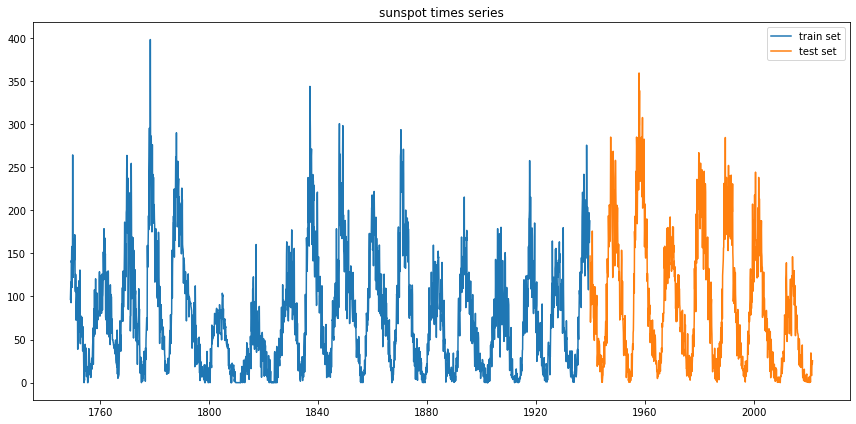

In [121]:
df_train, df_test = split_train_test(df, 0.7)
_ = plot_train_test(df_train, df_test, title="sunspot times series")

train_index = 819
test_index = 817
819
train_index = 1636
test_index = 817
1636
train_index = 2453
test_index = 817
2453


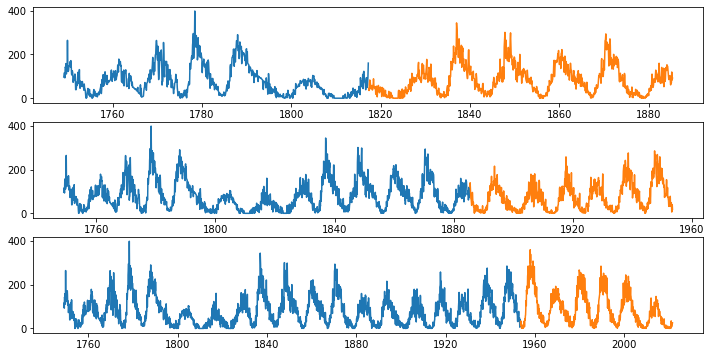

In [138]:
tscv = TimeSeriesSplit(n_splits=3)
fig = plt.figure(figsize=(12,6))
index = 1
for train_index, test_index in tscv.split(df):
    print(f"train_index = {train_index.size}")
    print(f"test_index = {test_index.size}")
    df_train = df.iloc[train_index]
    df_test = df.iloc[test_index]
    print(f"{df_train.size}")
    plt.subplot(310 + index)
    plt.plot(df_train)
    plt.plot(df_test)
    index += 1
    
plt.show()